In [1]:
!git clone https://github.com/Techies01TC/Stylegan_Color_Gender_Control.git

Cloning into 'Stylegan_Color_Gender_Control'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 69 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [2]:
cd /content/Stylegan_Color_Gender_Control

/content/Stylegan_Color_Gender_Control


In [3]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2022-04-03 02:45:57--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 52.84.18.96, 52.84.18.74, 52.84.18.33, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|52.84.18.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  41.9MB/s    in 11s     

2022-04-03 02:46:09 (33.9 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



Seed Num:4082049000
1
Loading networks from "ffhq.pkl"...
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
tst_e:100.8
Generating images...
Generating style-mixed images...
Seed Num:4082049000
Loading networks from "ffhq.pkl"...
tst_e:99.39999999999999
Positive numbers in the list:  5886
Negative numbers in the list:  3330
Generating images...
Generating style-mixed images...


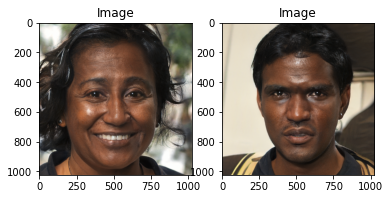

In [4]:
# Copyright (c) 2021, NVIDIA CORPORATION.  All rights reserved.
#
# NVIDIA CORPORATION and its licensors retain all intellectual property
# and proprietary rights in and to this software, related documentation
# and any modifications thereto.  Any use, reproduction, disclosure or
# distribution of this software and related documentation without an express
# license agreement from NVIDIA CORPORATION is strictly prohibited.

"""Generate style mixing image matrix using pretrained network pickle."""

import os
import re
from typing import List

import click
import dnnlib
import numpy as np
import PIL.Image
import torch
import legacy 
#import gender_
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------------
import cv2
def c_n_i(list1:list):
  # list of numbers
  #list1 = [10, -21, 4, -45, 66, -93, 1]
  neg_count = 0
  # iterating each number in list
  for num in list1:
      
    # checking condition
    if num >= 0:
        pass
  
    else:
        neg_count += 1
#from google.colab.patches import ##cv2_imshow
def num_range(s: str) -> List[int]:
    '''Accept either a comma separated list of numbers 'a,b,c' or a range 'a-c' and return as a list of ints.'''

    range_re = re.compile(r'^(\d+)-(\d+)$')
    m = range_re.match(s)
    if m:
        return list(range(int(m.group(1)), int(m.group(2))+1))
    vals = s.split(',')
    return [int(x) for x in vals]

#----------------------------------------------------------------------------

def generate_style_mix(
    network_pkl: str,
    row_seeds: List[int],
    col_seeds: List[int],
    col_styles: List[int],
    truncation_psi: float,
    noise_mode: str,
    outdir: str,Gender_name_:str):
    print('Loading networks from "%s"...' % network_pkl)
    #device = torch.device('cuda')
    device = torch.device('cpu')
    with dnnlib.util.open_url(network_pkl) as f:
        G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

    os.makedirs(outdir, exist_ok=True)

    #print('Generating W vectors...')
    all_seeds = list(set(row_seeds))
    all_z = np.stack([np.random.RandomState(seed).randn(G.z_dim) for seed in all_seeds])
    #print(f'All z:{all_z}')
    all_w = G.mapping(torch.from_numpy(all_z).to(device), None)
    w_avg = G.mapping.w_avg
    #print(f'w_avg:{w_avg}')
    #For Color Styling
    #all_w = w_avg + (all_w - w_avg) * truncation_psi
    all_w = w_avg + (all_w - w_avg) * 1
    w_dict1 = {seed: w for seed, w in zip(all_seeds, list(all_w))}
    all_w1=all_w
    ####################
    #For Gender 
    all_seeds = list(set(col_seeds))
    all_z = np.stack([np.random.RandomState(seed).randn(G.z_dim) for seed in all_seeds])
    #print(f'All z:{all_z}')
    all_w = G.mapping(torch.from_numpy(all_z).to(device), None)
    w_avg = G.mapping.w_avg
    #print(f'w_avg:{w_avg}')
    #all_w = w_avg + (all_w - w_avg) * truncation_psi
    tst_e=100.1+truncation_psi
    print(f'tst_e:{tst_e}')
    all_w_l=[]
    if tst_e>100.1:
      #all_w = w_avg + (all_w *(0.9)+ w_avg *(0.7))
      all_w = w_avg + (all_w *(0.7)- w_avg *(0.9))
      #fl_nm=np.array(all_w.tolist()).flatten()
      #print(all_w.tolist())
      #all_w_l.append(list(all_w-all_w*0.3))
      #all_w_l.append(list(all_w))
      all_w_l.append(list(all_w))
      #f_val=all_w+all_w*(0.7)+w_avg *(0.7)
      fl_nm=np.array(all_w.tolist()).flatten()
      #list1=fl_nm
      #c_n_i(fl_nm)
      pos_count,neg_count = 0,0
      # iterating each number in list
      for num in fl_nm:
        # checking condition
        if num >= 0:
          #pass
          pos_count += 1
        else:
          neg_count += 1
      #print("Positive numbers in the list: ", pos_count)
      #print("Negative numbers in the list: ", neg_count)
      #print(fl_nm)
      #n_i=re.findall('-',str(fl_nm))
      #print(len(n_i))
      #print(f'Gender-1_Score:{np.sum(fl_nm)}')
      #percent_scrore_neg=(neg_count/np.sum(fl_nm))*100
      #print(f'Negative Percentage Score:{percent_scrore_neg}')
      #percent_scrore_pos=(pos_count/np.sum(fl_nm))*100
      #print(f'Positive Percentage Score:{percent_scrore_pos}')
      #fl_nm=np.array(all_w)*(-1)
      #fl_nm=np.array(all_w).tolist()
      #print(fl_nm)
    else:
      #all_w = w_avg + ((all_w) * (0.3) - w_avg * (0.3))
      #all_w = w_avg - ((all_w) * (0.9) - w_avg * (0.7))
      #all_w = w_avg - ((all_w) * (0.3) - w_avg * (0.7))
      all_w = w_avg - ((all_w) * (0.7) - w_avg * (0.9))
      #fl_nm=np.array(all_w.tolist())*(-1)
      #fl_nm=fl_nm.tolist()
      #all_w_l.append(fl_nm)
      #fl_nm=np.array(all_w.tolist()).flatten()
      #f_val=all_w-all_w*(0.7)-w_avg *(0.7)
      fl_nm=np.array(all_w.tolist()).flatten()
      pos_count,neg_count = 0,0
      # iterating each number in list
      for num in fl_nm:
        # checking condition
        if num >= 0:
          pos_count +=1
          #pass
        else:
          neg_count += 1
      print("Positive numbers in the list: ", pos_count)
      print("Negative numbers in the list: ", neg_count)
      #c_n_i(fl_nm)
      #print(fl_nm)
      #n_i=re.findall('-',str(fl_nm))
      #print(len(n_i))
      #print(f'Gender-2_score: {np.sum(fl_nm)}')
      #percent_scrore_neg=(neg_count/np.sum(fl_nm))*100
      #print(f'Negative Percentage Score:{percent_scrore_neg}')
      #percent_scrore_pos=(pos_count/np.sum(fl_nm))*100
      #print(f'Positive Percentage Score:{percent_scrore_pos}')
      #print(all_w.tolist())
      #all_w_l.append(all_w)
      #Dont Change
      #all_w_l.append(list(all_w-all_w*(0.3)+w_avg *(1.2)))
      all_w_l.append(list(all_w))
    all_w=all_w_l[0]
    #all_seeds=list(col_seeds)
    #print(f'all_seeds:{all_seeds}')
    #w_dict2 = {seed: w for seed, w in zip(all_seeds, list(all_w))}
    w_dict2 = {seed: w for seed, w in zip(all_seeds, all_w)}
    all_w2=all_w
    ######
    #all_w=all_w1+all_w2
    #all_seeds=list(row_seeds + col_seeds)
    #print(f'all_seeds:{all_seeds}')
    #w_dict = {seed: w for seed, w in zip(all_seeds, list(all_w))}
    #print(f'w_dict:{w_dict}')
    print('Generating images...')
    #all_images = G.synthesis(all_w, noise_mode=noise_mode,force_fp32=True)
    #all_images = (all_images.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8).cpu().numpy()
    #image_dict = {(seed, seed): image for seed, image in zip(all_seeds, list(all_images))}
    print('Generating style-mixed images...')
    image_dictl=[]
    for row_seed in row_seeds:
        for col_seed in col_seeds:
            w = w_dict1[row_seed].clone()
            #print(f'w:{w}')
            w[col_styles] = w_dict2[col_seed][col_styles]
            image = G.synthesis(w[np.newaxis], noise_mode=noise_mode,force_fp32=True)
            image = (image.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8).cpu().numpy()
            #print(f'row_seed, col_seed {row_seed},{col_seed}')
            #image_dict[(row_seed, col_seed)] = image[0].cpu().numpy()
            image_dict = {(seed, seed): image for seed, image in zip(all_seeds, list(image))}
            image_dict[(row_seed, col_seed)] = image[0]
            image_dictl.append(image_dict)
    image_dict=image_dictl[0]
    #print('Saving images...')
    os.makedirs(outdir, exist_ok=True)
    i=0
    for (row_seed, col_seed), image in image_dict.items():
      if i<3:
        #PIL.Image.fromarray(image, 'RGB').save(f'{outdir}/{row_seed}-{col_seed}.png')
        #print('Image:',image_dict.items())
        PIL.Image.fromarray(image, 'RGB').save(f'{outdir}/{Gender_name_}.png')
        output_file_png=f'{outdir}/{Gender_name_}.png'
        if truncation_psi==0.7:
          plt.subplot(1, 2, 1)
          plt.imshow(plt.imread(output_file_png))
          plt.title('Image')

        else:
          plt.subplot(1, 2, 2)
          plt.imshow(plt.imread(output_file_png))
          plt.title('Image')
        #gender_.predict_gender(output_file_png)
        #predict_gender(output_file_png,gender_confidence_score_l,gender_l)
        break
        i+=1 


#----------------------------------------------------------------------------

if __name__ == "__main__":
    #Col_styles:[0, 1, 2, 3, 4, 5, 6]
    #'network_pkl', 'row_seeds', 'col_seeds', 'col_styles', 'truncation_psi', 'noise_mode', and 'outdir'
    #https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
    network_pkl='ffhq.pkl'
    #col_styles=[0, 1, 2, 3, 4, 5, 6]
    #col_styles=[7, 7, 7, 7, 7, 7, 7]
    col_styles=[0, 1, 2, 3, 4, 5, 6]
    #row_seeds=[85,100,75,458,1500]
    #row_seeds=[55,821,1789,293,142,85,100,75,458,1500]
    #row_seeds=[142,85,100,75,458,1500]
    #Change from above list
    #If in -ve 75,100-Brown hair with bluish eye
    #-458,white skin dotted,black hair
    #-1084,black,Asian 
    #-968,1883,Asian black
    #-1301,Asian white
    #seed_num=4200000000
    seed_num=random.randrange(0,4200000000,1000)
    #seed_num=random.randrange(0,4200000000)
    #child
    #seed_num=2921642588
    #seed_num=4002730806
    #seed_num=1289013609
    #seed_num=1745902369
    #seed_num=1447800125
    #seed_num=312526298
    #seed_num=1943772261
    #seed_num=1838724915
    #seed_num=0
    #seed_num=1990874000
    #seed_num=3225610000
    #seed_num=3454553000
    #Deformed  due to seed 0.9
    #seed_num=1305907000
    #seed_num=0
    #seed_num=299223000
    #seed_num=3269980000
    #seed_num=647513872
    print(f'Seed Num:{seed_num}')
    #row_seeds=[85,100,75,458,1500]
    ############# CHANGE ROW SEED NUMBER FROM HERE FOR CHANGING ETHINICITY ########################################################
    row_seeds=[75]
    #458-White with Blue eyes
    #75-Black (African)
    #85-white with brown hair
    #100-Asian (South Asian)
    #1500-White with dark complaxion
    ############################################################################################################################
    #Random seeds
    col_seeds=[seed_num]
    #col_seeds=[55,821,1789,293]
    #a=input('Enter 1 for male and 2 for female:')
    #a=int(a)
    a=1
    print(a)
    truncation_psi=0.7
    noise_mode='const'
    outdir='./'
    Gender_name_='Gender 1'
    gender_confidence_score_l=[]
    gender_l=[]
    a1=generate_style_mix(network_pkl,row_seeds,col_seeds,col_styles,truncation_psi,noise_mode,outdir,Gender_name_)
    #pickle.dump(open('words.pkl','rb'))
    #print('Pickeling.....')
    #pickle.dump(a1,open('words.pkl','wb'))
    #print('Pickeling.....Done.')
    truncation_psi=-0.7
    Gender_name_='Gender 2'
    print(f'Seed Num:{seed_num}')
    generate_style_mix(network_pkl,row_seeds,col_seeds,col_styles,truncation_psi,noise_mode,outdir,Gender_name_)
    #print(f'Gender Confidence Score:{gender_confidence_score_l}')
    #print(f'Gender:{gender_l}')
